Fourier series and transform methods in quantitative finance

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


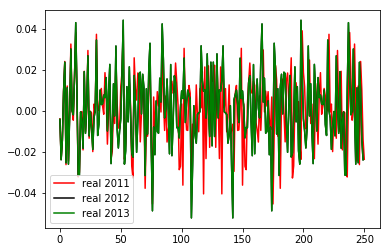

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

data_amzn_2011 = yf.download("AMZN", start="2011-01-01", end="2011-12-31")
data_amzn_2012 = yf.download("AMZN", start="2012-01-01", end="2012-12-31")
data_amzn_2013 = yf.download("AMZN", start="2013-01-01", end="2013-12-31")

data_amzn_2011['log return'] = np.log(data_amzn_2011['Adj Close']).diff()
data_amzn_2012['log return'] = np.log(data_amzn_2012['Adj Close']).diff()
data_amzn_2013['log return'] = np.log(data_amzn_2013['Adj Close']).diff()

data_amzn_2011=data_amzn_2011.iloc[1:]
data_amzn_2012=data_amzn_2011.iloc[1:]
data_amzn_2013=data_amzn_2011.iloc[1:]




def DFT(x):
    """
    Compute the discrete Fourier Transform of the 1D array x
    :param x: (array)
    """
    N = x.size
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    return np.dot(e, x)


def dft(x):
  N, yr, yi = len(x), [], []
  for k in range(N):
    real, imag = 0, 0
    for n in range(N):
      theta = -k * (2 * math.pi) * (float(n) / N)
      real += x[n] * math.cos(theta)
      imag += x[n] * math.sin(theta)
    yr.append(real / math.sqrt(N))
    yi.append(imag / math.sqrt(N))
  return yr, yi

fft_real_2011,fft_imag_2011=dft(data_amzn_2011["log return"])
fft_real_2012,fft_imag_2012=dft(data_amzn_2012["log return"])
fft_real_2013,fft_imag_2013=dft(data_amzn_2013["log return"])

plot2011real, = plt.plot(fft_real_2011,'r')
plot2012real, = plt.plot(fft_real_2012,'black')
plot2013real, = plt.plot(fft_real_2013,'g')

plt.legend([plot2011real,plot2012real,plot2013real],["real 2011", "real 2012","real 2013"])
plt.show()



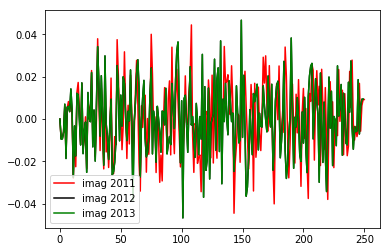

In [3]:
plot2011imag, = plt.plot(fft_imag_2011,'r')
plot2012imag, = plt.plot(fft_imag_2012,'black')
plot2013imag, = plt.plot(fft_imag_2013,'g')

plt.legend([plot2011imag,plot2012imag,plot2013imag],["imag 2011", "imag 2012","imag 2013"])
plt.show()

#real and imaginary are the even and odd parts of the function

In [ ]:
#part 3

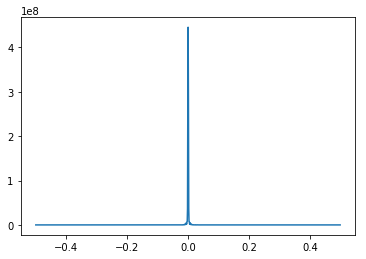

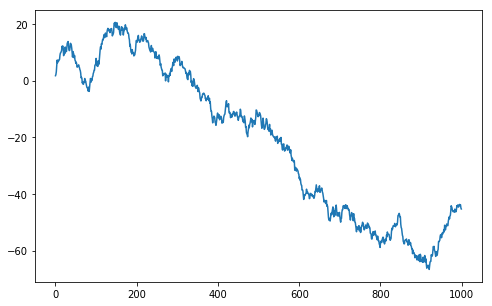

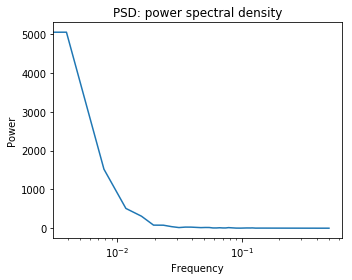

In [8]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
data =np.cumsum(np.random.randn(1000))
ps = np.abs(np.fft.fft(data))**2

time_step = 1 
freqs = np.fft.fftfreq(data.size, time_step)
idx = np.argsort(freqs)

plt.plot(freqs[idx], ps[idx])

np.random.seed(0)

time_step = 1
time_vec = np.arange(0, 1000, time_step)

# A signal with a small frequency chirp
sig = data

plt.figure(figsize=(8, 5))
plt.plot(time_vec, sig)

freqs, psd = signal.welch(sig)

plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()


plt.show()

3.4

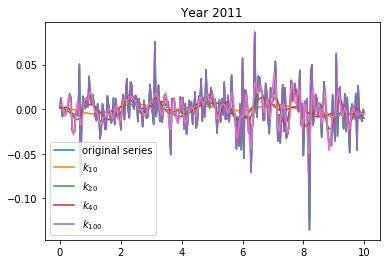

In [9]:
from scipy.fftpack import dct, idct
import matplotlib.pyplot as plt
N =251
t = np.linspace(0,10,N)
x=data_amzn_2011["log return"]
y = dct(x, norm='ortho')
window = np.zeros(N)
window[:10] = 1
yr = idct(y*window, norm='ortho')
K10=sum(abs(x-yr)**2) 

plt.plot(t, x)
plt.plot(t, yr)
window = np.zeros(N)
window[:20] = 1
yr = idct(y*window, norm='ortho')
K20=sum(abs(x-yr)**2) 

plt.plot(t, x)
plt.plot(t, yr)
window = np.zeros(N)
window[:40] = 1
yr = idct(y*window, norm='ortho')
K40=sum(abs(x-yr)**2)

plt.plot(t, x)
plt.plot(t, yr)
window = np.zeros(N)
window[:100] = 1
yr = idct(y*window, norm='ortho')
K100=sum(abs(x-yr)**2) 
plt.plot(t, yr)
plt.legend(['original series', '$k_{10}$', '$k_{20}$','$k_{40}$','$k_{100}$'])
#plt.figure(figsize = (10, 5))
#plt.grid()
plt.title('Year 2011')
plt.show()

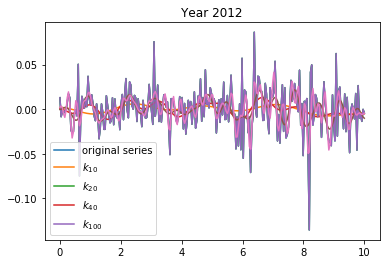

In [10]:
##2012
x=data_amzn_2012["log return"]
y = dct(x, norm='ortho')
N=250
t = np.linspace(0,10,N)
window = np.zeros(N)
window[:10] = 1
yr = idct(y*window, norm='ortho')
sum(abs(x-yr)**2) / sum(abs(x)**2)

plt.plot(t, x)
plt.plot(t, yr)
window = np.zeros(N)
window[:20] = 1
yr = idct(y*window, norm='ortho')
sum(abs(x-yr)**2) / sum(abs(x)**2)

plt.plot(t, x)
plt.plot(t, yr)
window = np.zeros(N)
window[:40] = 1
yr = idct(y*window, norm='ortho')
sum(abs(x-yr)**2) / sum(abs(x)**2)

plt.plot(t, x)
plt.plot(t, yr)
window = np.zeros(N)
window[:100] = 1
yr = idct(y*window, norm='ortho')
sum(abs(x-yr)**2) / sum(abs(x)**2)
plt.plot(t, yr)
plt.legend(['original series', '$k_{10}$', '$k_{20}$','$k_{40}$','$k_{100}$'])
#plt.figure(figsize = (10, 5))
#plt.grid()
plt.title('Year 2012')
plt.show()


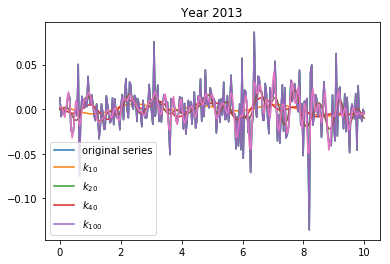

In [11]:
###2013
x=data_amzn_2013["log return"]
y = dct(x, norm='ortho')
N =250
t = np.linspace(0,10,N)
window = np.zeros(N)
window[:10] = 1
yr = idct(y*window, norm='ortho')
sum(abs(x-yr)**2) / sum(abs(x)**2)

plt.plot(t, x)
plt.plot(t, yr)
window = np.zeros(N)
window[:20] = 1
yr = idct(y*window, norm='ortho')
sum(abs(x-yr)**2) / sum(abs(x)**2)

plt.plot(t, x)
plt.plot(t, yr)
window = np.zeros(N)
window[:40] = 1
yr = idct(y*window, norm='ortho')
sum(abs(x-yr)**2) / sum(abs(x)**2)

plt.plot(t, x)
plt.plot(t, yr)
window = np.zeros(N)
window[:100] = 1
yr = idct(y*window, norm='ortho')
sum(abs(x-yr)**2) / sum(abs(x)**2)
plt.plot(t, yr)
plt.legend(['original series', '$k_{10}$', '$k_{20}$','$k_{40}$','$k_{100}$'])
#plt.figure(figsize = (10, 5))
#
plt.title('Year 2013')
plt.show()

question 3.5

In [12]:
list1=[K10,K20,K40,K100]#coded above
df=pd.DataFrame(list1)
#K10,K20,K40,K100
#.rename(index={0:'zero',1:'one'}, inplace=True)
df.rename(index={0:'K10',1:'K20',2:'K40',3:'K100'}, inplace=True)
df#error decreases with increase in window


,0
K10,0.144514
K20,0.138538
K40,0.125312
K100,0.094833


question 3.6

<Figure size 720x432 with 0 Axes>

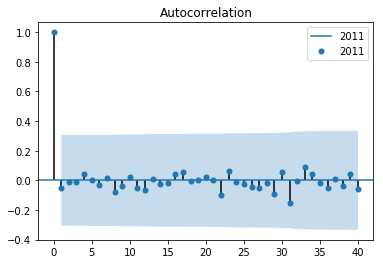

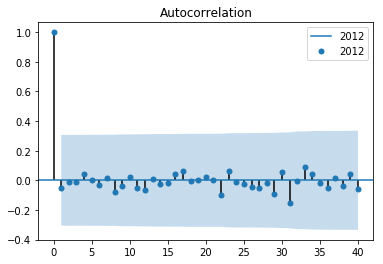

In [16]:
#part 6
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

acf2011 = acf(data_amzn_2011['log return'])
acf2012 = acf(data_amzn_2012['log return'])
acf2013 = acf(data_amzn_2013['log return'])
plt.figure(figsize = (10, 6))
plot_acf(acf2011, label = '2011')
plt.legend(loc = 'best')
plot_acf(acf2012, label = '2012')
plt.legend(loc = 'best')
#plot_acf(acf2013, label = '2013')
#plt.legend(loc = 'best')#stationary series with lag of 1

#fft_acf_2011= np.fft.fft(acf2011)
#plt.plot(fft_acf_2011)

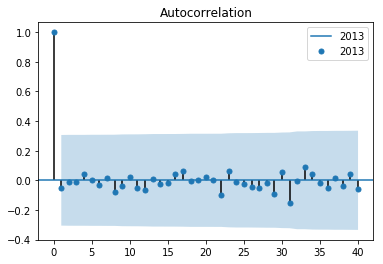

In [18]:
plot_acf(acf2013, label = '2013')
plt.legend(loc = 'best')

Note: As seen by above all series exhibit stationarity